In [1]:
#Random Forest Regression

#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, precision_score, recall_score, classification_report, accuracy_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc


In [2]:
#importing the dataset
dataset = pd.read_csv("Dataset.csv")

In [137]:
dataset

,Day,Date,CodedDay,Zone,Weather,Temperature,Traffic
0,Wednesday,01-06-18,3,2,35,17,2
1,Wednesday,01-06-18,3,3,36,16,3
2,Wednesday,01-06-18,3,4,27,25,5
3,Wednesday,01-06-18,3,5,23,23,3
4,Wednesday,01-06-18,3,6,18,42,2
...,...,...,...,...,...,...,...
1434,Friday,10-06-18,5,140,47,38,1
1435,Friday,10-06-18,5,141,15,8,4
1436,Friday,10-06-18,5,142,26,38,1
1437,Friday,10-06-18,5,143,16,34,3


In [138]:
X = dataset.iloc[:, 2:6].values
y = dataset.iloc[:, 6:7].values

In [139]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder() 
  
dataset['Date']= le.fit_transform(dataset['Date'])

In [140]:
#splitting into Train and Test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [141]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler=MinMaxScaler()
X_train=min_max_scaler.fit_transform(X_train)
X_test=min_max_scaler.fit_transform(X_test)

In [142]:
# # Feature scaling
# from sklearn.preprocessing import StandardScaler
# sc_X = StandardScaler()
# X_train = sc_X.fit_transform(X_train)
# X_test = sc_X.transform(X_test)



In [143]:
# # Fitting the Random Forest Classifier
# model = RandomForestClassifier(n_estimators=300, criterion = 'entropy', random_state=0)
# model.fit(X_train, y_train)

# # Predicting the test results
# y_pred = model.predict(X_test)

In [144]:
model = OneVsRestClassifier(RandomForestClassifier(max_features=0.2))
model.fit(X_train,y_train)

# Predicting the test results
y_pred = model.predict(X_test)
pred_prob = model.predict_proba(X_test)

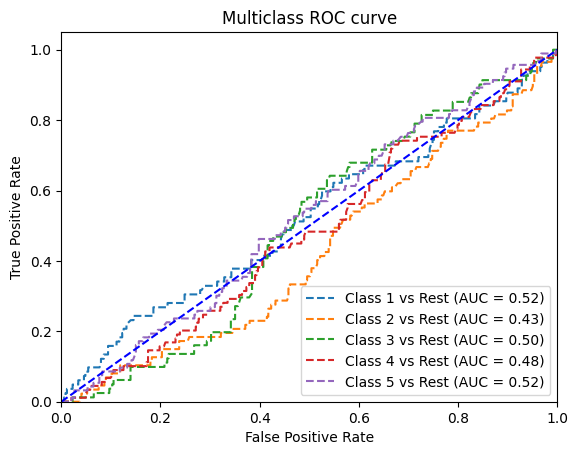

In [145]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt

# Binarize the y_test values
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))

# Number of classes
n_class = y_test_binarized.shape[1]

# Dictionary to store the false positive rates, true positive rates, and ROC AUC for each class
fpr = {}
tpr = {}
thresh = {}
roc_auc = {}

# Predict probabilities for each class
pred_prob = model.predict_proba(X_test)  # Make sure this is the predicted probabilities from your model

# Calculate ROC curve and ROC AUC for each class
for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_binarized[:, i], pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
    # Plotting each class's ROC curve
    plt.plot(fpr[i], tpr[i], linestyle='--', label=f'Class {i+1} vs Rest (AUC = {roc_auc[i]:.2f})')

# Plotting the random chance line
plt.plot([0,1], [0,1], 'b--')

# Add plot labels and title
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()


In [146]:
# Calculate precision and recall for the multiclass problem
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')

# Print precision and recall
print(f"Precision (Macro-Averaged): {precision:.2f}")
print(f"Recall (Macro-Averaged): {recall:.2f}")

# Full classification report
report = classification_report(y_test, y_pred, target_names=np.unique(y_test).astype(str))
print("Classification Report:\n", report)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Precision (Macro-Averaged): 0.18
Recall (Macro-Averaged): 0.18
Classification Report:
               precision    recall  f1-score   support

           1       0.25      0.26      0.25        82
           2       0.15      0.16      0.15        87
           3       0.14      0.17      0.16        81
           4       0.17      0.11      0.14        89
           5       0.20      0.20      0.20        93

    accuracy                           0.18       432
   macro avg       0.18      0.18      0.18       432
weighted avg       0.18      0.18      0.18       432

Accuracy: 0.18
